In [49]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score, train_test_split, GridSearchCV
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import classification_report


In [50]:
import warnings
warnings.filterwarnings("ignore")
warnings.filterwarnings("ignore", message="Variables are collinear")

In [51]:
df = pd.read_csv('/Users/benji/Documents/Machine Learning/Data/cannabis_full.csv')

In [52]:
df.head()

,Strain,Type,Rating,Effects,Flavor,Creative,Energetic,Tingly,Euphoric,Relaxed,...,Ammonia,Minty,Tree,Fruit,Butter,Pineapple,Tar,Rose,Plum,Pear
0,100-Og,hybrid,4.0,"Creative,Energetic,Tingly,Euphoric,Relaxed","Earthy,Sweet,Citrus",1.0,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,98-White-Widow,hybrid,4.7,"Relaxed,Aroused,Creative,Happy,Energetic","Flowery,Violet,Diesel",1.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1024,sativa,4.4,"Uplifted,Happy,Relaxed,Energetic,Creative","Spicy/Herbal,Sage,Woody",1.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,13-Dawgs,hybrid,4.2,"Tingly,Creative,Hungry,Relaxed,Uplifted","Apricot,Citrus,Grapefruit",1.0,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,24K-Gold,hybrid,4.6,"Happy,Relaxed,Euphoric,Uplifted,Talkative","Citrus,Earthy,Orange",0.0,0.0,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [53]:
df.columns

Index(['Strain', 'Type', 'Rating', 'Effects', 'Flavor', 'Creative',
       'Energetic', 'Tingly', 'Euphoric', 'Relaxed', 'Aroused', 'Happy',
       'Uplifted', 'Hungry', 'Talkative', 'Giggly', 'Focused', 'Sleepy', 'Dry',
       'Mouth', 'Earthy', 'Sweet', 'Citrus', 'Flowery', 'Violet', 'Diesel',
       'Spicy/Herbal', 'Sage', 'Woody', 'Apricot', 'Grapefruit', 'Orange',
       'Pungent', 'Grape', 'Pine', 'Skunk', 'Berry', 'Pepper', 'Menthol',
       'Blue', 'Cheese', 'Chemical', 'Mango', 'Lemon', 'Peach', 'Vanilla',
       'Nutty', 'Chestnut', 'Tea', 'Tobacco', 'Tropical', 'Strawberry',
       'Blueberry', 'Mint', 'Apple', 'Honey', 'Lavender', 'Lime', 'Coffee',
       'Ammonia', 'Minty', 'Tree', 'Fruit', 'Butter', 'Pineapple', 'Tar',
       'Rose', 'Plum', 'Pear'],
      dtype='object')

In [54]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2351 entries, 0 to 2350
Data columns (total 69 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Strain        2351 non-null   object 
 1   Type          2351 non-null   object 
 2   Rating        2351 non-null   float64
 3   Effects       2264 non-null   object 
 4   Flavor        2195 non-null   object 
 5   Creative      2321 non-null   float64
 6   Energetic     2320 non-null   float64
 7   Tingly        2313 non-null   float64
 8   Euphoric      2331 non-null   float64
 9   Relaxed       2318 non-null   float64
 10  Aroused       2306 non-null   float64
 11  Happy         2326 non-null   float64
 12  Uplifted      2330 non-null   float64
 13  Hungry        2318 non-null   float64
 14  Talkative     2311 non-null   float64
 15  Giggly        2311 non-null   float64
 16  Focused       2312 non-null   float64
 17  Sleepy        2318 non-null   float64
 18  Dry           2305 non-null 

In [55]:
df = df.dropna()
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2191 entries, 0 to 2350
Data columns (total 69 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Strain        2191 non-null   object 
 1   Type          2191 non-null   object 
 2   Rating        2191 non-null   float64
 3   Effects       2191 non-null   object 
 4   Flavor        2191 non-null   object 
 5   Creative      2191 non-null   float64
 6   Energetic     2191 non-null   float64
 7   Tingly        2191 non-null   float64
 8   Euphoric      2191 non-null   float64
 9   Relaxed       2191 non-null   float64
 10  Aroused       2191 non-null   float64
 11  Happy         2191 non-null   float64
 12  Uplifted      2191 non-null   float64
 13  Hungry        2191 non-null   float64
 14  Talkative     2191 non-null   float64
 15  Giggly        2191 non-null   float64
 16  Focused       2191 non-null   float64
 17  Sleepy        2191 non-null   float64
 18  Dry           2191 non-null   flo

In [56]:
df['Type'].unique()

array(['hybrid', 'sativa', 'indica'], dtype=object)

# Part One: Binary Classification

In [57]:
dfb = df[(df['Type'] == 'sativa') | (df['Type'] == 'indica')]

In [58]:
X = dfb.drop(columns=['Type', 'Effects', 'Flavor','Strain'])
y = dfb['Type']

### Q1: LDA

In [59]:
lda = LinearDiscriminantAnalysis()

param_grid = {
    'solver': ['svd', 'lsqr', 'eigen'],  # Solvers for LDA
    'shrinkage': [None, 'auto', 0.1, 0.5, 0.9],  # Applicable to 'lsqr' and 'eigen' solvers
}

grid_search = GridSearchCV(lda,param_grid,cv=5,scoring='accuracy')

grid_search.fit(X, y)

# Get the best parameters and best score
print(f"Best Cross-validated Accuracy: {grid_search.best_score_:.3f}")

# Train the model with the best parameters
best_lda = grid_search.best_estimator_
best_lda.fit(X, y)

# Predict and evaluate
y_pred = best_lda.predict(X)
conf_matrix = confusion_matrix(y, y_pred)
print("Confusion Matrix:\n", conf_matrix)


Best Cross-validated Accuracy: 0.871
Confusion Matrix:
 [[603  56]
 [ 69 340]]


### Q2: QDA

In [60]:
qda = QuadraticDiscriminantAnalysis()
param_grid = {
    'reg_param': [0.0, 0.1, 0.2, 0.5, 0.7, 1.0],  # Regularization parameters
    'tol': [1e-4, 1e-3, 1e-2, 1e-1],  # Tolerance for convergence
}

grid_search = GridSearchCV(qda, param_grid, cv=5, scoring='accuracy')  

grid_search.fit(X, y)

print(f"Best Parameters: {grid_search.best_params_}")
print(f"Best Cross-validated Accuracy: {grid_search.best_score_:.3f}")

best_qda = grid_search.best_estimator_
best_qda.fit(X, y)

y_pred = best_qda.predict(X)
conf_matrix = confusion_matrix(y, y_pred)
print("Confusion Matrix:\n", conf_matrix)

Best Parameters: {'reg_param': 0.1, 'tol': 0.0001}
Best Cross-validated Accuracy: 0.866
Confusion Matrix:
 [[609  50]
 [ 59 350]]


### Q3: SVC

In [61]:
# Grid search for hyperparameter tuning
svc = SVC()
param_grid = {'C': [0.1, 1, 10], 'kernel': ['linear', 'rbf'], 'gamma': ['scale', 'auto']}
grid = GridSearchCV(svc, param_grid, cv=5, scoring='f1_macro')
grid.fit(X,y)

best_svc = grid.best_estimator_
print(f"Best SVC Parameters: {grid.best_params_}")

cv_scores = cross_val_score(best_svc, X,y, cv=5, scoring='f1_macro')
print(f"Cross-validated F1-score: {cv_scores.mean():.3f}")

best_svc.fit(X,y)
y_pred = best_svc.predict(X)

conf_matrix = confusion_matrix(y, y_pred)
print("Confusion Matrix:\n", conf_matrix)


Best SVC Parameters: {'C': 10, 'gamma': 'auto', 'kernel': 'rbf'}
Cross-validated F1-score: 0.860
Confusion Matrix:
 [[610  49]
 [ 58 351]]


### Q4: SVM

In [62]:
# Grid search for polynomial kernel SVM
param_grid = {'C': [0.1, 1, 10], 'degree': [2, 3, 4], 'gamma': ['scale', 'auto']}
poly_svm = GridSearchCV(SVC(kernel='poly'), param_grid, cv=5, scoring='accuracy')
poly_svm.fit(X,y)

# Best model
best_poly_svm = poly_svm.best_estimator_
print(f"Best SVM Parameters: {poly_svm.best_params_}")

# Cross-validate
cv_scores = cross_val_score(best_poly_svm, X,y, cv=5, scoring='accuracy')
print(f"Cross-validated accuracy: {cv_scores.mean():.3f}")

# Fit and predict
best_poly_svm.fit(X,y)
y_pred = best_poly_svm.predict(X)

# Confusion matrix
conf_matrix = confusion_matrix(y, y_pred)
print("Confusion Matrix:\n", conf_matrix)


Best SVM Parameters: {'C': 10, 'degree': 3, 'gamma': 'auto'}
Cross-validated accuracy: 0.868
Confusion Matrix:
 [[617  42]
 [ 74 335]]


# Part Two: Natural Multiclass

In [63]:
X_new = df.drop(columns=['Type', 'Effects', 'Flavor','Strain'])
y_new = df['Type']

**Q1. Fit a decision tree, plot the final fit, and interpret the results.**

In [64]:
dt_pipeline = DecisionTreeClassifier(random_state=42)

# Hyperparameter Grid
param_grid = {
    'max_depth': [3, 5, 10],             # Tree depth
    'min_samples_split': [2, 5, 10],     # Minimum samples required to split an internal node
    'min_samples_leaf': [1, 2, 4]        # Minimum samples required to be a leaf node
}

# Perform Grid Search with Cross-Validation
grid_search = GridSearchCV(
    dt_pipeline, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_new, y_new)

# Best Model and Cross-Validated Accuracy
best_dt = grid_search.best_estimator_
cv_accuracy = grid_search.best_score_

print("Best Parameters:", grid_search.best_params_)
print("Cross-Validation Accuracy (Decision Tree):", cv_accuracy)

# Fit the best model on the full training data
best_dt.fit(X_new, y_new)

# Predictions and Evaluation on Test Data
y_pred_dt_full = best_dt.predict(X_new)
dt_test_accuracy = accuracy_score(y_new, y_pred_dt_full)
conf_matrix_dt = confusion_matrix(y_new, y_pred_dt_full)


Best Parameters: {'max_depth': 3, 'min_samples_leaf': 1, 'min_samples_split': 2}
Cross-Validation Accuracy (Decision Tree): 0.6198084064030954


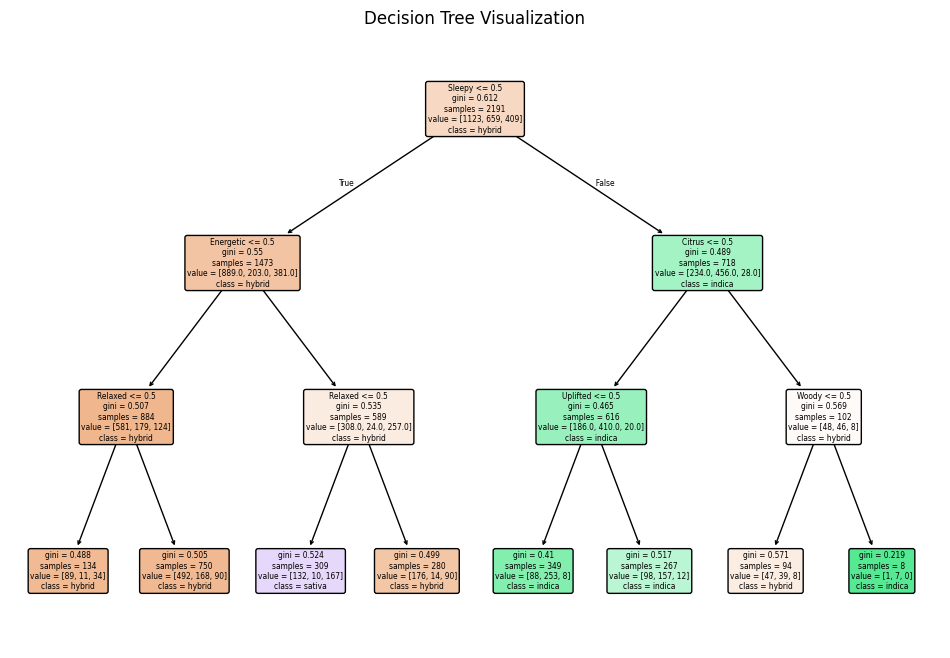

In [65]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 8))
# Get column names from original DataFrame (X_full) before scaling

plot_tree(best_dt,feature_names= X_new.columns,  class_names=best_dt.classes_,filled=True,rounded=True)
plt.title("Decision Tree Visualization")
plt.show()


We can the first split is in the sleepy predictor, which implies it holds the most predictive power, then it is between energetic and citru, those hold the next most importance in predicting the final results.

**Q2 Repeat the analyses from Part One for LDA, QDA, and KNN.**

In [66]:
lda = LinearDiscriminantAnalysis()

param_grid = {
    'solver': ['svd', 'lsqr', 'eigen'],  # Solvers for LDA
    'shrinkage': [None, 'auto', 0.1, 0.5, 0.9],  # Applicable to 'lsqr' and 'eigen' solvers
}

grid_search = GridSearchCV(lda,param_grid,cv=5,scoring='accuracy')

grid_search.fit(X_new, y_new)

# Get the best parameters and best score
print(f"Best Cross-validated Accuracy: {grid_search.best_score_:.3f}")

# Train the model with the best parameters
best_lda = grid_search.best_estimator_
best_lda.fit(X_new, y_new)

# Predict and evaluate
y_pred = best_lda.predict(X_new)
conf_matrix = confusion_matrix(y_new, y_pred)
print("Confusion Matrix:\n", conf_matrix)

Best Cross-validated Accuracy: 0.629
Confusion Matrix:
 [[759 214 150]
 [192 457  10]
 [203  19 187]]


In [67]:
# Grid search for hyperparameter tuning
svc = SVC()
param_grid = {'C': [0.1, 1, 10], 'kernel': ['linear', 'rbf'], 'gamma': ['scale', 'auto']}
grid = GridSearchCV(svc, param_grid, cv=5, scoring='accuracy')
grid.fit(X_new, y_new)

best_svc = grid.best_estimator_
print(f"Best SVC Parameters: {grid.best_params_}")

cv_scores = cross_val_score(best_svc, X_new, y_new, cv=5, scoring='accuracy')
print(f"Cross-validated accuracy: {cv_scores.mean():.3f}")

best_svc.fit(X_new, y_new)
y_pred = best_svc.predict(X_new)

conf_matrix = confusion_matrix(y_new, y_pred)
print("Confusion Matrix:\n", conf_matrix)


Best SVC Parameters: {'C': 10, 'gamma': 'auto', 'kernel': 'rbf'}
Cross-validated accuracy: 0.627
Confusion Matrix:
 [[840 227  56]
 [202 454   3]
 [260  20 129]]


In [68]:
knn = KNeighborsClassifier()
param_grid_knn = {'n_neighbors': [3, 5, 7, 9], 'weights': ['uniform', 'distance']}
grid_knn = GridSearchCV(knn, param_grid_knn, cv=5, scoring='accuracy')
grid_knn.fit(X_new, y_new)

best_knn = grid_knn.best_estimator_
print(f"Best KNN Parameters: {grid_knn.best_params_}")

# Evaluate
y_pred_knn = best_knn.predict(X_new)
accuracy_knn = accuracy_score(y_new, y_pred_knn)
conf_matrix_knn = confusion_matrix(y_new, y_pred_knn)

print(f"KNN Accuracy: {accuracy_knn:.3f}")
print("KNN Confusion Matrix:\n", conf_matrix_knn)


Best KNN Parameters: {'n_neighbors': 7, 'weights': 'uniform'}
KNN Accuracy: 0.677
KNN Confusion Matrix:
 [[895 160  68]
 [227 427   5]
 [224  23 162]]


In [69]:
import pandas as pd
# Confusion matrix with labels
labels = ['Sativa', 'Indica', 'Hybrid']  # Update with your class names
conf_matrix_knn = pd.DataFrame(conf_matrix_knn, index=labels, columns=labels)

print("Confusion Matrix with Labels:")
print(conf_matrix_knn)


Confusion Matrix with Labels:
        Sativa  Indica  Hybrid
Sativa     895     160      68
Indica     227     427       5
Hybrid     224      23     162


**Q3. Were your metrics better or worse than in Part One? Why? Which categories were most likely to get mixed up, according to the confusion matrices? Why?**

The accuracy decressed and it make sense as it the overall performance metric, The hybrid is most likely to got misclasified, it makes sense as it consist of many similar qualities of the other types.

# Part Three: Multiclass from Binary

**Consider two models designed for binary classification: SVC and Logistic Regression.**

In [70]:
df["is_indica"] = (df["Type"] == "indica").astype(int)
df["is_sativa"] = (df["Type"] == "sativa").astype(int)
df["is_hybrid"] = (df["Type"] == "hybrid").astype(int)

**Q1 Fit and report metrics for OvR versions of the models. That is, for each of the two model types, create three models:**

**Indica vs. Not Indica**

In [71]:
X = df.drop(columns = ["is_indica","is_sativa","is_hybrid","Type","Strain", "Effects", "Flavor"])
y = df["is_indica"]


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

lr = LogisticRegression(random_state=42)
lr.fit(X_train, y_train)

#evaluate
y_pred = lr.predict(X_test)
print("Metrics for Logistic Regression: Indica vs. Not Indica")
print(classification_report(y_test, y_pred))

Metrics for Logistic Regression: Indica vs. Not Indica
              precision    recall  f1-score   support

           0       0.82      0.87      0.84       301
           1       0.67      0.58      0.62       138

    accuracy                           0.78       439
   macro avg       0.75      0.73      0.73       439
weighted avg       0.77      0.78      0.77       439



In [72]:
svc = SVC(probability=True, random_state=42)
svc.fit(X_train,y_train)

y_pred = svc.predict(X_test)
print("Metrics for SVC: Indica vs. Not Indica")
print(classification_report(y_test, y_pred))

Metrics for SVC: Indica vs. Not Indica
              precision    recall  f1-score   support

           0       0.81      0.81      0.81       301
           1       0.59      0.59      0.59       138

    accuracy                           0.74       439
   macro avg       0.70      0.70      0.70       439
weighted avg       0.74      0.74      0.74       439



**Sativa vs. Not Sativa**

In [73]:
X = df.drop(columns = ["is_indica","is_sativa","is_hybrid","Type","Strain", "Effects", "Flavor"])
y = df["is_sativa"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

lr = LogisticRegression(random_state=1)
lr.fit(X_train, y_train)

#evaluate
y_pred = lr.predict(X_test)
print("Metrics for Logistic Regression: Sativa vs. Not Sativa")
print(classification_report(y_test, y_pred))

Metrics for Logistic Regression: Sativa vs. Not Sativa
              precision    recall  f1-score   support

           0       0.86      0.93      0.90       450
           1       0.50      0.32      0.39        98

    accuracy                           0.82       548
   macro avg       0.68      0.62      0.64       548
weighted avg       0.80      0.82      0.80       548



In [74]:
svc = SVC(probability=True, random_state=1)
svc.fit(X_train,y_train)

y_pred = svc.predict(X_test)
print("Metrics for SVC: Sativa vs. Not Sativa")
print(classification_report(y_test, y_pred))

Metrics for SVC: Sativa vs. Not Sativa
              precision    recall  f1-score   support

           0       0.82      1.00      0.90       450
           1       0.00      0.00      0.00        98

    accuracy                           0.82       548
   macro avg       0.41      0.50      0.45       548
weighted avg       0.67      0.82      0.74       548



**Hybrid Vs not Hybrid LR**

In [75]:
X = df.drop(columns = ["is_indica","is_sativa","is_hybrid","Type","Strain", "Effects", "Flavor"])
y = df["is_hybrid"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

lr = LogisticRegression(random_state=1)
lr.fit(X_train, y_train)

y_pred = lr.predict(X_test)
print("Metrics for Logistic Regression: Hybrid vs. Not Hybrid")
print(classification_report(y_test, y_pred))

Metrics for Logistic Regression: Hybrid vs. Not Hybrid
              precision    recall  f1-score   support

           0       0.61      0.55      0.58       268
           1       0.61      0.67      0.64       280

    accuracy                           0.61       548
   macro avg       0.61      0.61      0.61       548
weighted avg       0.61      0.61      0.61       548



In [76]:
svc = SVC(probability=True, random_state=42)
svc.fit(X_train,y_train)

y_pred = svc.predict(X_test)
print("Metrics for SVC: Hybrid vs. Not Hybrid")
print(classification_report(y_test, y_pred))

Metrics for SVC: Hybrid vs. Not Hybrid
              precision    recall  f1-score   support

           0       0.62      0.43      0.51       268
           1       0.58      0.74      0.65       280

    accuracy                           0.59       548
   macro avg       0.60      0.59      0.58       548
weighted avg       0.60      0.59      0.58       548



Logistic Regression for Sativa and not Sativa gave the best results, worst is the hybrid SVC model this make sense as it is classifying the hybrid species which is already difficult to classify.

**Q2. Which of the six models did the best job distinguishing the target category from the rest? Which did the worst? Does this make intuitive sense?**

In [77]:
X = df.drop(columns=["Type", "Strain", "Effects", "Flavor","is_indica","is_sativa","is_hybrid"])
y = df["Type"]

class_pairs = [("indica", "sativa"), ("indica", "hybrid"), ("hybrid", "sativa")] # pairs of interest

for class1, class2 in class_pairs: # loop through, filter using mask, convert to binary (had some AI help creating this loop)

    mask = (y == class1) | (y == class2)
    X_filtered, y_filtered = X[mask], y[mask]

    y_binary = np.where(y_filtered == class1, 1, 0)

    X_train, X_test, y_train, y_test = train_test_split(X_filtered, y_binary, test_size=0.2, stratify=y_binary, random_state=1)

    svc = SVC(probability=True, random_state=1)
    svc.fit(X_train, y_train)

    y_pred = svc.predict(X_test)
    print(f"Metrics for SVC: {class1} vs. {class2}")
    print(classification_report(y_test, y_pred))

Metrics for SVC: indica vs. sativa
              precision    recall  f1-score   support

           0       0.82      0.78      0.80        82
           1       0.87      0.89      0.88       132

    accuracy                           0.85       214
   macro avg       0.84      0.84      0.84       214
weighted avg       0.85      0.85      0.85       214

Metrics for SVC: indica vs. hybrid
              precision    recall  f1-score   support

           0       0.80      0.77      0.78       225
           1       0.63      0.67      0.65       132

    accuracy                           0.73       357
   macro avg       0.72      0.72      0.72       357
weighted avg       0.74      0.73      0.74       357

Metrics for SVC: hybrid vs. sativa
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        82
           1       0.73      1.00      0.85       225

    accuracy                           0.73       307
   macro avg       0.37

In [78]:
for class1, class2 in class_pairs:

    mask = (y == class1) | (y == class2)
    X_filtered, y_filtered = X[mask], y[mask]

    y_binary = np.where(y_filtered == class1, 1, 0)

    X_train, X_test, y_train, y_test = train_test_split(
        X_filtered, y_binary, test_size=0.2, stratify=y_binary, random_state=1
    )

    lr = LogisticRegression(random_state=1)
    lr.fit(X_train, y_train)

    y_pred = lr.predict(X_test)
    print(f"Metrics for Logistic Regression: {class1} vs. {class2}")
    print(classification_report(y_test, y_pred))

Metrics for Logistic Regression: indica vs. sativa
              precision    recall  f1-score   support

           0       0.78      0.79      0.79        82
           1       0.87      0.86      0.87       132

    accuracy                           0.84       214
   macro avg       0.83      0.83      0.83       214
weighted avg       0.84      0.84      0.84       214

Metrics for Logistic Regression: indica vs. hybrid
              precision    recall  f1-score   support

           0       0.79      0.82      0.80       225
           1       0.67      0.62      0.64       132

    accuracy                           0.75       357
   macro avg       0.73      0.72      0.72       357
weighted avg       0.74      0.75      0.74       357

Metrics for Logistic Regression: hybrid vs. sativa
              precision    recall  f1-score   support

           0       0.57      0.30      0.40        82
           1       0.78      0.92      0.84       225

    accuracy                 

Best model would be SVC for Indica vs Sativa and worst model is SVC hybrid vs Staiva. It makes sense as classifing against hybrid will always be little complicated as it has the properties of both species.
Classifing between Indica and Sativa should be good as it has different properties.

**Q3 Suppose you had simply input the full data, with three classes, into the LogisticRegression function. Would this have automatically taken an “OvO” approach or an “OvR” approach?What about for SVC?**

If we simply input the full data with three classes:
Logistic Regressionnn fucntion default approch is One vs Rest (OvR).<br>
SVC's default approch would be One vs One (OvO).